## Motivasi
Regresi Linier adalah salah satu alat paling mendasar dalam pembelajaran mesin. Ini digunakan untuk menemukan garis lurus yang sesuai dengan data kita. **Meskipun hanya bekerja dengan pola garis lurus sederhana, memahami matematika di baliknya membantu kita memahami metode Penurunan Gradien dan Minimisasi Kerugian.** Hal ini penting untuk model yang lebih rumit yang digunakan dalam semua tugas pembelajaran mesin dan pembelajaran mendalam.



In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [66]:
X, y = datasets.make_regression(
    n_samples=1000, n_features=3, noise=15,
    random_state=41, shuffle=False
)

In [67]:
X

array([[-0.27071232,  0.10484805,  0.25052782],
       [-0.92519997,  0.56714366, -1.04018022],
       [-0.15367595,  0.78985181, -1.22621585],
       ...,
       [-1.98317266, -0.87286305,  0.60328922],
       [-1.01488457,  2.42582473,  0.63854619],
       [-1.41552696,  0.96357168, -0.4065303 ]])

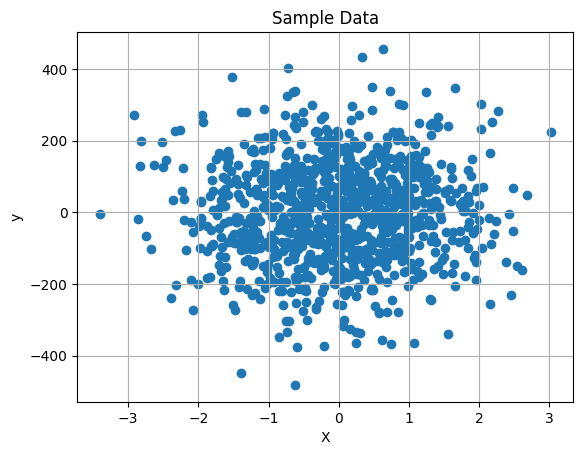

In [70]:
plt.scatter(X[:, 1], y)
plt.title("Sample Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid();

bertujuan untuk menemukan garis paling sesuai yang melewati pusat data ini, meminimalkan perbedaan rata-rata antara nilai prediksi dan nilai y asli.

## Intitusi
Persamaan umum garis linier adalah:

y = m*X + b

X adalah numerik, bernilai tunggal. Di sini m dan b mewakili **gradien** dan **perpotongan y** (atau bias). Ini tidak diketahui, dan nilai yang bervariasi dapat menghasilkan garis yang berbeda. Dalam pembelajaran mesin, X bergantung pada data, begitu pula nilai y. Kami hanya memiliki kendali atas m dan b, yang bertindak sebagai parameter model kami. ini bertujuan untuk menemukan nilai optimal dari kedua parameter ini, yang menghasilkan garis yang meminimalkan perbedaan antara nilai prediksi dan nilai y aktual.

Hal ini meluas ke skenario di mana X bersifat multidimensi. Dalam hal ini, jumlah nilai m akan sama dengan jumlah dimensi pada data kita. Misalnya, jika data kita memiliki tiga fitur berbeda, kita akan memiliki tiga nilai m berbeda, yang disebut **bobot (weights)**.
Persamaannya sekarang menjadi:

y = w1*X1 + w2*X2 + w3*X3 + b

Hal ini kemudian dapat meluas ke sejumlah fitur. Namun bagaimana kita mengetahui nilai optimal dari nilai bias dan bobot kita? Ya, kami tidak melakukannya. Tapi kita bisa menemukannya secara berulang menggunakan Gradient Descent. Kita mulai dengan nilai acak dan mengubahnya sedikit dalam beberapa langkah hingga mendekati nilai optimal.


In [74]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape     # X shape [N, f]
        self.weights = np.random.rand(num_features)  # W shape [f, 1]
        self.bias = 0

        for i in range(self.n_iters):

            # y_pred shape should be N, 1
            y_pred = np.dot(X, self.weights) + self.bias

            # X -> [N,f]
            # y_pred -> [N]
            # dw -> [f]
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Loss Function & Gradient Descent
<img src="https://www.kdnuggets.com/wp-content/uploads/arham_linear_regression_scratch_numpy_2.png">

<img src="https://www.kdnuggets.com/wp-content/uploads/arham_linear_regression_scratch_numpy_1.png">

Kami kemudian mengoptimalkan bobot kami berdasarkan nilai gradien, menggunakan Gradient Descent.

<img src="https://www.kdnuggets.com/wp-content/uploads/arham_linear_regression_scratch_numpy_3.png">

Kami mengambil gradien sehubungan dengan setiap nilai bobot dan kemudian memindahkannya ke kebalikan dari gradien. Hal ini mendorong kerugian ke arah minimum. Sesuai gambar, gradiennya positif, jadi kami mengurangi bobotnya. Hal ini mendorong J(W) atau kerugian menuju nilai minimum. Oleh karena itu, persamaan optimasinya terlihat sebagai berikut:

<img src="https://www.kdnuggets.com/wp-content/uploads/arham_linear_regression_scratch_numpy_7.png">

Kecepatan pemelajaran (atau alfa) mengontrol langkah tambahan yang ditunjukkan pada gambar. Kami hanya melakukan sedikit perubahan pada nilainya, untuk pergerakan stabil menuju minimum.

Jika kita menyederhanakan persamaan turunan menggunakan manipulasi aljabar dasar, penerapannya menjadi sangat mudah.

<img src="https://www.kdnuggets.com/wp-content/uploads/arham_linear_regression_scratch_numpy_9.png">

In [77]:
# plt.grid()
# plt.title('Linear Regression Model')
# plt.xlabel('X')
# plt.ylabel('Y')

# # plt.scatter(X[:, 1], y)
# plt.plot(LinearRegression(n_iters=0).fit(X, y).predict(
#         X), linewidth=2, color='black', label='prediction')
# plt.legend()
# plt.show()

## Test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234)

In [83]:
model = LinearRegression(n_iters=1000, lr=0.1)
model.fit(X_train, y_train)

In [84]:
predictions = model.predict(X_test)
print(f'MSE: {mean_squared_error(predictions, y_test)}')

MSE: 254.29028440315622


In [85]:
predictions

array([-187.03819022,  127.17717053,  -24.7958828 , -155.31103068,
       -102.64510569,   26.98091266,  300.49599748, -108.29966697,
       -184.75118997,   58.01628378,  -73.27585789,  124.91263009,
         -8.43651754, -159.10556923, -365.34733081,  -21.68721322,
       -213.54000105, -153.94904584, -183.81358302, -164.26782257,
        -76.4100067 ,   45.12697967,    5.52629287,   69.79056887,
        -18.2594222 ,  113.43423151,  -86.51983533, -192.20891027,
        138.8820804 , -101.33999505,  -66.28466337,  -65.12646537,
         23.67226076, -109.35693621,   76.79561566,  267.67973741,
         77.6370907 , -106.66089113,  -56.33853185,  -16.21817553,
        136.63730571,   78.83598247,  -55.54289916,  -64.53440619,
        -29.13505428,   -8.9129595 , -328.85010255,   38.86292356,
        -74.15476382,  206.80389836,   -0.95512653,   -8.85438145,
        -98.22356039,  -42.71798158,  -57.7517912 , -270.24463902,
         77.80275008,   47.50872867,  -95.02980874, -135.10164

In [86]:
# plt.grid()
# plt.title('Linear Regression Model')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.scatter(X, y)
# plt.plot(X, model.predict(X), linewidth=2,
#              color='black', label='prediction')
# plt.legend()
# plt.show()